# ML Notebook Template

## CRISP-DM Model
__Cross Industry Standard Process for Data Modelling__
This template builds on top of the Ideas in the CRISP-DM Model  
![The CRISP-DM Model](https://www.datenbanken-verstehen.de/dbv/uploads/crisp_dm-480x480.jpg)  



# 1. Business Understanding
Write here, what the Business Case is.  
What is the Business about?  
What are the challenges?  
What is the context for the data?  


# 2. Data and Data Understanding
## 2.1. Import of Relevant Modules

In [245]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation

## 2.2. Read Data

In [246]:
df = pd.read_csv('dataset.csv')

## 2.3 Data Visualization and Data Exploration

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [248]:
e = ""
column = ""
for col in df.columns:
    col_dropna = df[col].dropna()
    example = col_dropna.sample(1).values[0]
    try:
        print(example.dtype)
        print(example.dtype.kind)
        e = example
        column = col_dropna
    except:
        pass
    

int64
i
int64
i
float64
f


In [249]:
column.dtype

dtype('float64')

In [250]:
e.dtype

dtype('float64')

In [251]:
e.dtype.kind

'f'

In [252]:
str(e.dtype)

'float64'

In [253]:
def attribute_description(data):
    longestColumnName = len(max(np.array(data.columns), key=len))
    length_first_col = longestColumnName + 1
    print("| "+ "Feature".ljust(length_first_col) +"| Data Type |")
    print("|" +"-"*(length_first_col+1)+ "|-----------|")
    for col in data.columns:
        description = ''
        col_dropna = data[col].dropna()
        example = col_dropna.sample(1).values[0]
        # if it is a string
        if type(example) == str:
            description = 'str '
            if len(col_dropna.unique()) < 10:
                description += '{'
                description += '; '.join([ f'"{name}"' for name in col_dropna.unique()])
                description += '}'
            else:
                description += '[ example: "'+ example + '" ]'
        # if it is a typical dummy variable int32 with less then 10 entries
        elif (type(example) == np.int32) and (len(col_dropna.unique()) < 10) :
            description += 'dummy int32 {'
            description += '; '.join([ f'{name}' for name in sorted(col_dropna.unique())])
            description += '}'
        # if it is a numpy type
        elif ('numpy' in str(type(example))):
            kind = example.dtype.kind
            if kind == 'i' or kind == 'u' or kind == 'f' or kind == 'c': # if it is a number
                description = f"{('numpy.'+str(e.dtype)).ljust(10)} [ {col_dropna.min()}; {col_dropna.max()} ]"
            else:
                description = type(example)
        else:
            description = type(example)
        print("| " + col.ljust(length_first_col)+ f'| {description} |')
 
attribute_description(df)

| Feature          | Data Type |
|------------------|-----------|
| customerID       | str [ example: "7209-JCUDS" ] |
| gender           | str {"Female"; "Male"} |
| SeniorCitizen    | numpy.float64 [ 0; 1 ] |
| Partner          | str {"Yes"; "No"} |
| Dependents       | str {"No"; "Yes"} |
| tenure           | numpy.float64 [ 0; 72 ] |
| PhoneService     | str {"No"; "Yes"} |
| MultipleLines    | str {"No phone service"; "No"; "Yes"} |
| InternetService  | str {"DSL"; "Fiber optic"; "No"} |
| OnlineSecurity   | str {"No"; "Yes"; "No internet service"} |
| OnlineBackup     | str {"Yes"; "No"; "No internet service"} |
| DeviceProtection | str {"No"; "Yes"; "No internet service"} |
| TechSupport      | str {"No"; "Yes"; "No internet service"} |
| StreamingTV      | str {"No"; "Yes"; "No internet service"} |
| StreamingMovies  | str {"No"; "Yes"; "No internet service"} |
| Contract         | str {"Month-to-month"; "One year"; "Two year"} |
| PaperlessBilling | str {"Yes"; "No"} |
| Payme

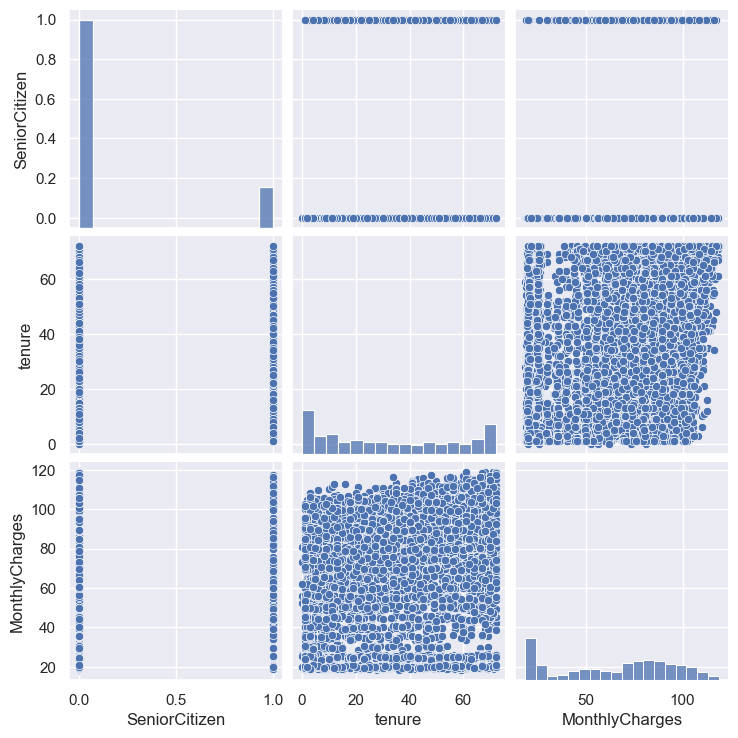

In [254]:
sns.pairplot(df)

array([[<AxesSubplot: title={'center': 'SeniorCitizen'}>,
        <AxesSubplot: title={'center': 'tenure'}>],
       [<AxesSubplot: title={'center': 'MonthlyCharges'}>,
        <AxesSubplot: >]], dtype=object)

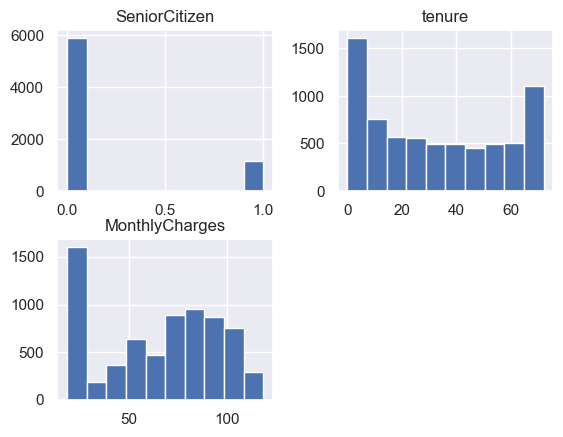

In [255]:
df.hist()

## 2.4. explore the Features
uncover hidden Information

# 3. Data Cleaning

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [257]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [258]:
df_cleaned = df.copy(deep=True)

## 3.1. duplicated rows

In [259]:
df_cleaned[df_cleaned.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## 3.2. Null Values

In [260]:
df_cleaned.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 3.3 Other fixes
like wrong Data Type

In [261]:
df_cleaned["TotalCharges"].dtype

dtype('O')

In [262]:
df_cleaned["TotalCharges"].value_counts().index 
# there is a '' in the Total charges

Index([' ', '20.2', '19.75', '20.05', '19.9', '19.65', '45.3', '19.55',
       '20.15', '20.25',
       ...
       '3306.85', '424.75', '6565.85', '2117.2', '203.95', '6849.4', '692.35',
       '130.15', '3211.9', '6844.5'],
      dtype='object', length=6531)

In [263]:
df_cleaned = df_cleaned[df_cleaned['TotalCharges'] != ' ']

In [264]:
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'])

In [265]:
df_cleaned['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

## 3.4. Outliers

array([[<AxesSubplot: title={'center': 'SeniorCitizen'}>,
        <AxesSubplot: title={'center': 'tenure'}>],
       [<AxesSubplot: title={'center': 'MonthlyCharges'}>,
        <AxesSubplot: title={'center': 'TotalCharges'}>]], dtype=object)

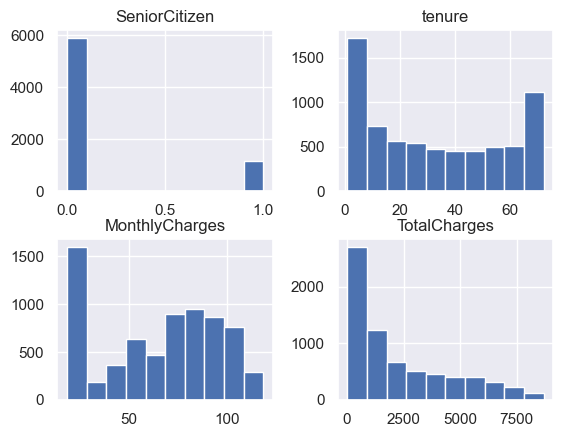

In [266]:
df_cleaned.hist()

In [267]:
# q = 10
# df_cleaned = df_cleaned[df_cleaned['f1']<= q]

## 3.5. Feature correlations

C:\Users\du-wa\AppData\Local\Temp\ipykernel_27924\1193206467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)


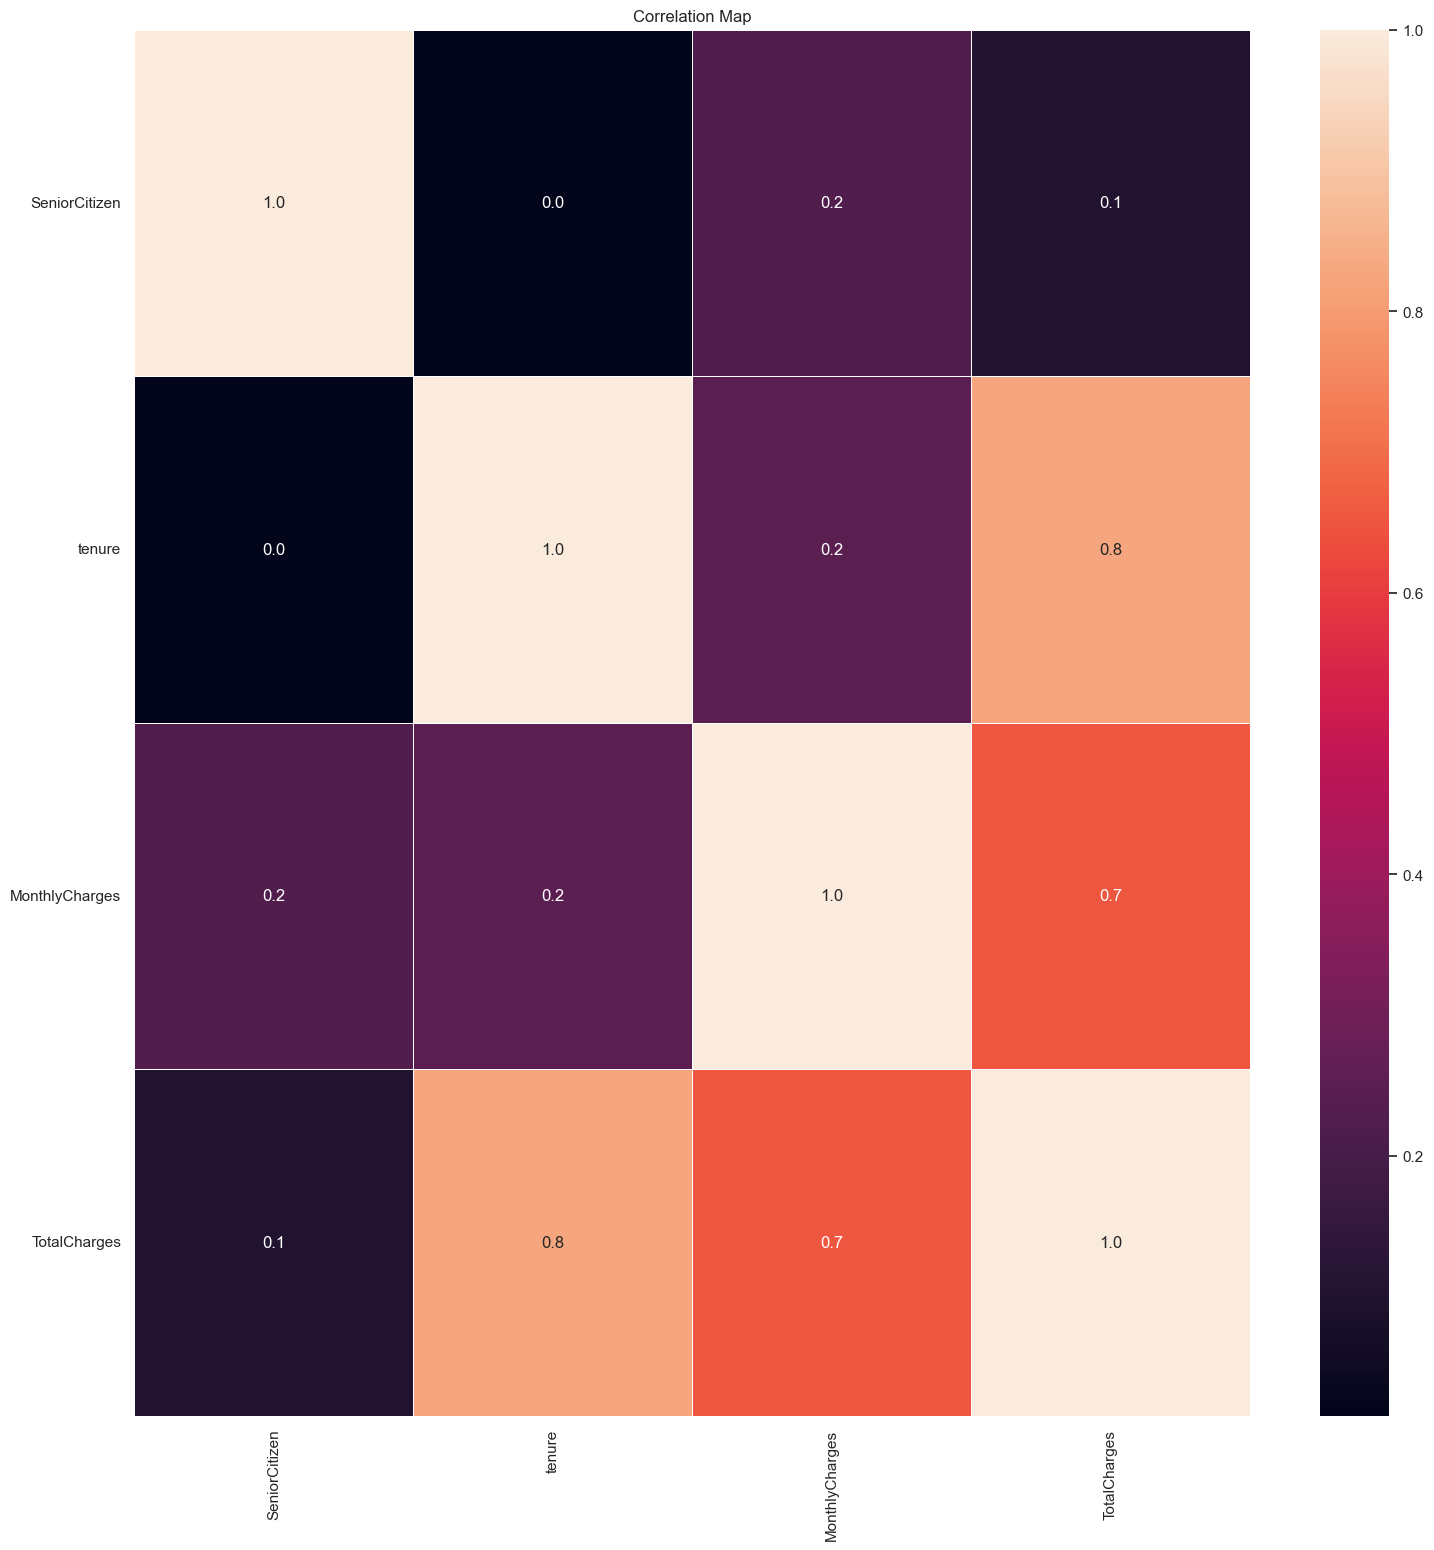

In [268]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_cleaned.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.show()

## 3.5 Other Operations

## 3.6 Test for Multicollinearity 

In [269]:
# # independent variables
# vif_test = df_cleaned.drop("Churn", axis=1)
# # vif_test = add_constant(vif_test)  
# # VIF dataframe 
# vif_data = pd.DataFrame() 
# vif_data["feature"] = vif_test.columns 
  
# # VIF for each Feature 
# for i in range(len(vif_test.columns)):
#     variance_inflation_factor(vif_test.values, i)
# # vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) for i in range(len(vif_test.columns))] 
  
# print(vif_data)

## 3.7 Drop useless Columns

In [270]:
attribute_description(df_cleaned)

| Feature          | Data Type |
|------------------|-----------|
| customerID       | str [ example: "9802-CAQUT" ] |
| gender           | str {"Female"; "Male"} |
| SeniorCitizen    | numpy.float64 [ 0; 1 ] |
| Partner          | str {"Yes"; "No"} |
| Dependents       | str {"No"; "Yes"} |
| tenure           | numpy.float64 [ 1; 72 ] |
| PhoneService     | str {"No"; "Yes"} |
| MultipleLines    | str {"No phone service"; "No"; "Yes"} |
| InternetService  | str {"DSL"; "Fiber optic"; "No"} |
| OnlineSecurity   | str {"No"; "Yes"; "No internet service"} |
| OnlineBackup     | str {"Yes"; "No"; "No internet service"} |
| DeviceProtection | str {"No"; "Yes"; "No internet service"} |
| TechSupport      | str {"No"; "Yes"; "No internet service"} |
| StreamingTV      | str {"No"; "Yes"; "No internet service"} |
| StreamingMovies  | str {"No"; "Yes"; "No internet service"} |
| Contract         | str {"Month-to-month"; "One year"; "Two year"} |
| PaperlessBilling | str {"Yes"; "No"} |
| Payme

In [271]:
df_cleaned = df_cleaned.drop('customerID', axis=1)

# 4. Modeling

## 4.1 create dummy variables

In [272]:
df_dummies = pd.get_dummies(df_cleaned, drop_first=True)

In [273]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [274]:
# independent variables
vif_test = df_dummies.drop("Churn_Yes", axis=1)
# vif_test = add_constant(vif_test)  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) for i in range(len(vif_test.columns))] 
  
print(vif_data.sort_values(by='VIF', ascending=False))

c:\Git_Repos\ML-notebook-template\venv\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                  feature          VIF
11                     InternetService_No          inf
12     OnlineSecurity_No internet service          inf
20        StreamingTV_No internet service          inf
18        TechSupport_No internet service          inf
16   DeviceProtection_No internet service          inf
14       OnlineBackup_No internet service          inf
22    StreamingMovies_No internet service          inf
7                        PhoneService_Yes  1773.528816
2                          MonthlyCharges   866.089640
10            InternetService_Fiber optic   148.500814
8          MultipleLines_No phone service    60.842267
23                    StreamingMovies_Yes    24.156394
21                        StreamingTV_Yes    24.080019
3                            TotalCharges    10.811490
1                                  tenure     7.584453
9                       MultipleLines_Yes     7.289761
17                   DeviceProtection_Yes     6.924754
15        

<AxesSubplot: >

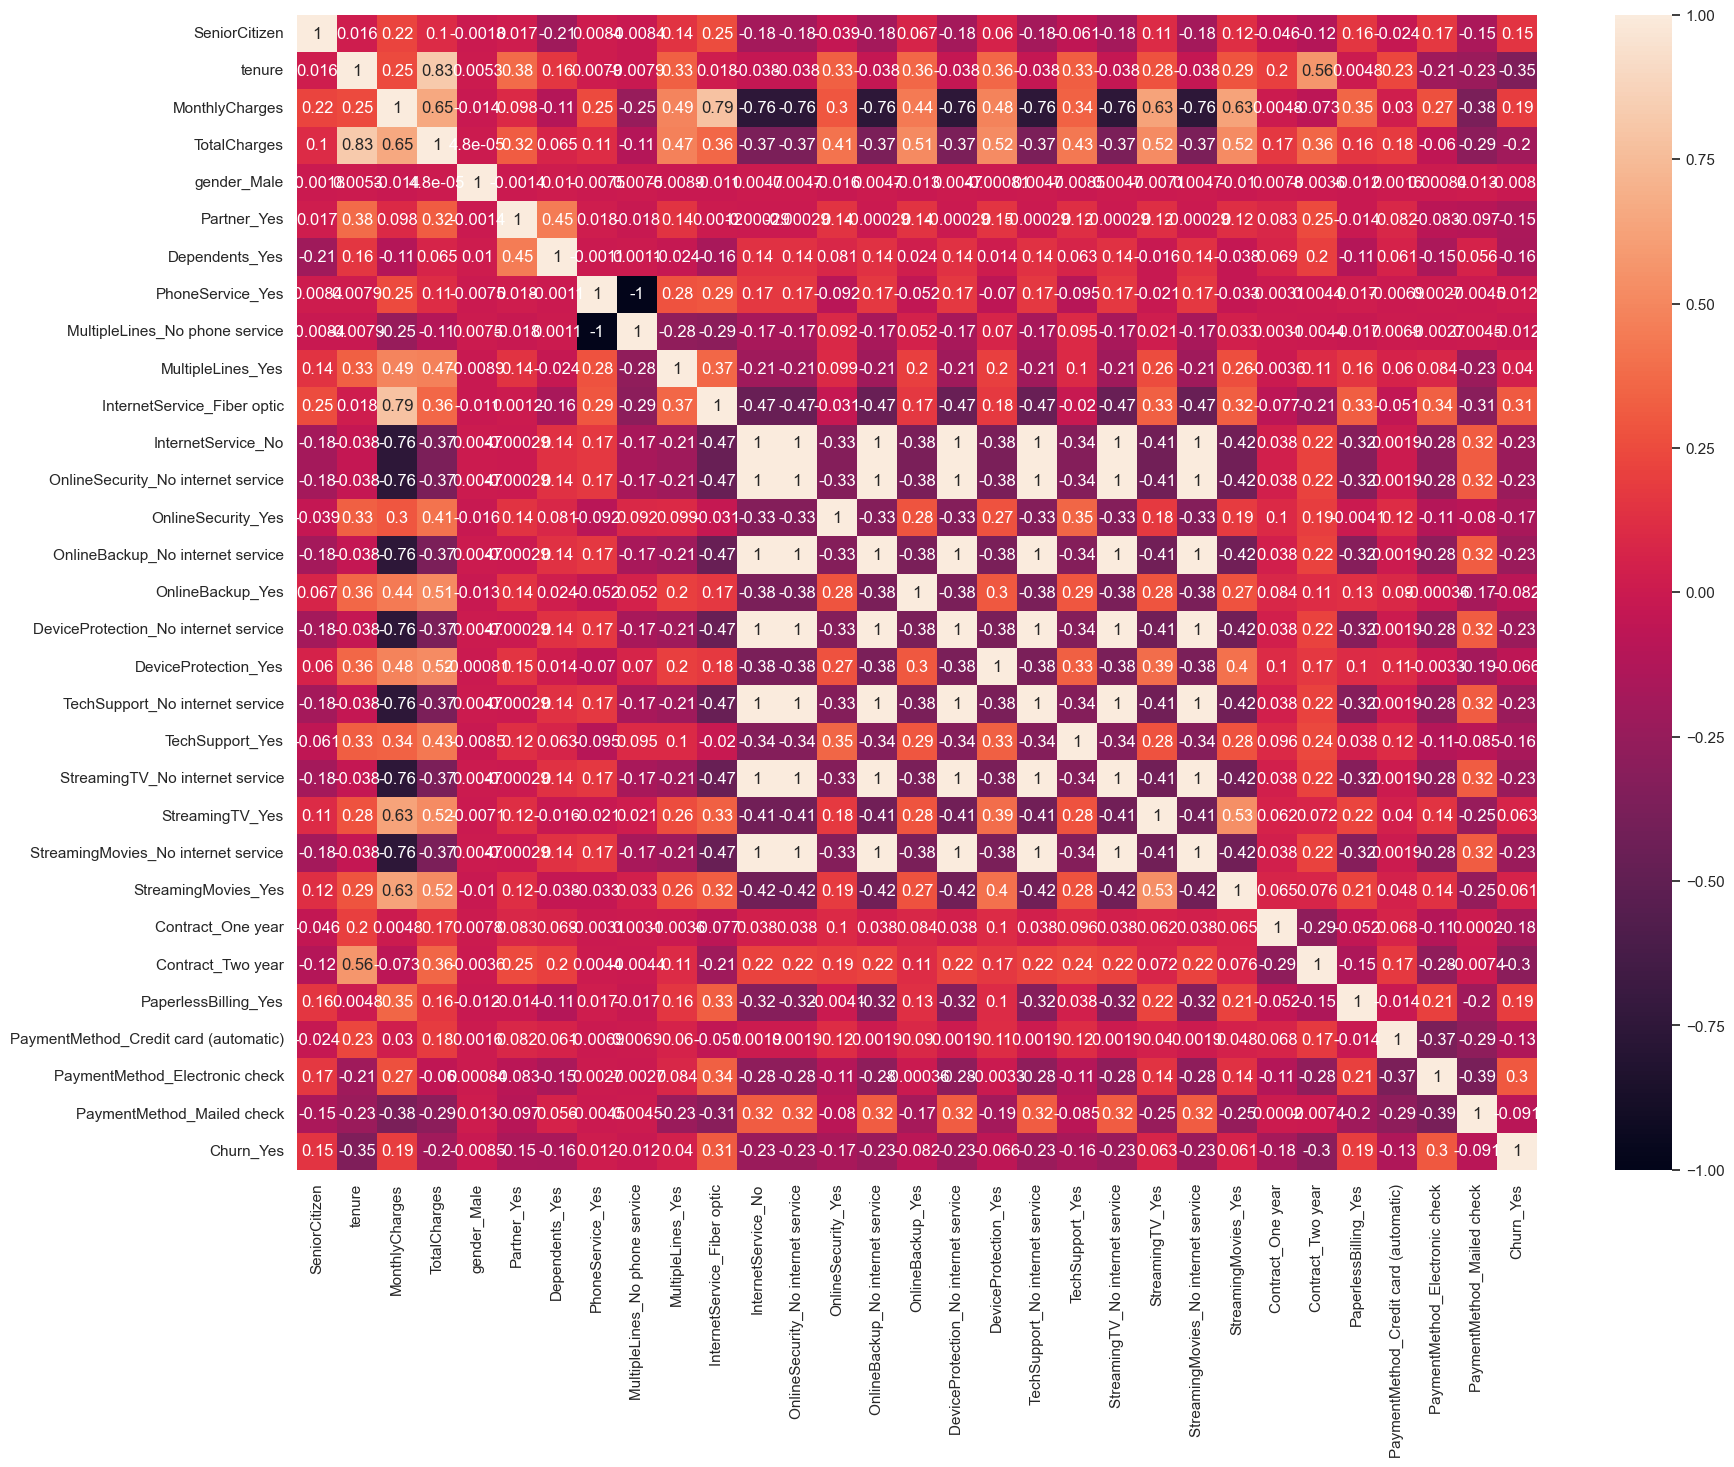

In [275]:
plt.figure(figsize=(20,15))
sns.heatmap(df_dummies.corr(), annot=True)

## 4.1. Feature Scaling

In [276]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [277]:
target_variable = 'Churn_Yes'
X = df_dummies.drop(target_variable, axis=1)
y = df_dummies[target_variable]

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [279]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Imbalanced dataset ? 

In [315]:
# import imblearn

## 5.0 Modelling

## Modelling and Model Evaluation

## desicion Tree

In [280]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [281]:
# tree.plot_tree(d_tree)

In [282]:
print(classification_report(y_train, d_tree.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3871
           1       1.00      0.99      1.00      1403

    accuracy                           1.00      5274
   macro avg       1.00      1.00      1.00      5274
weighted avg       1.00      1.00      1.00      5274



In [283]:
print(classification_report(y_test, d_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1292
           1       0.49      0.48      0.49       466

    accuracy                           0.73      1758
   macro avg       0.65      0.65      0.65      1758
weighted avg       0.73      0.73      0.73      1758



In [284]:
#helper function
def make_confusion_matrix(y_test, prediction_test):
    cm = confusion_matrix(y_test,prediction_test)
    df_cm = pd.DataFrame(cm, index=['False','True'], columns=['False', 'True'],)
    fig = plt.figure(figsize=[8,8])
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
    plt.ylabel('actual label')
    plt.xlabel('Predicted label')


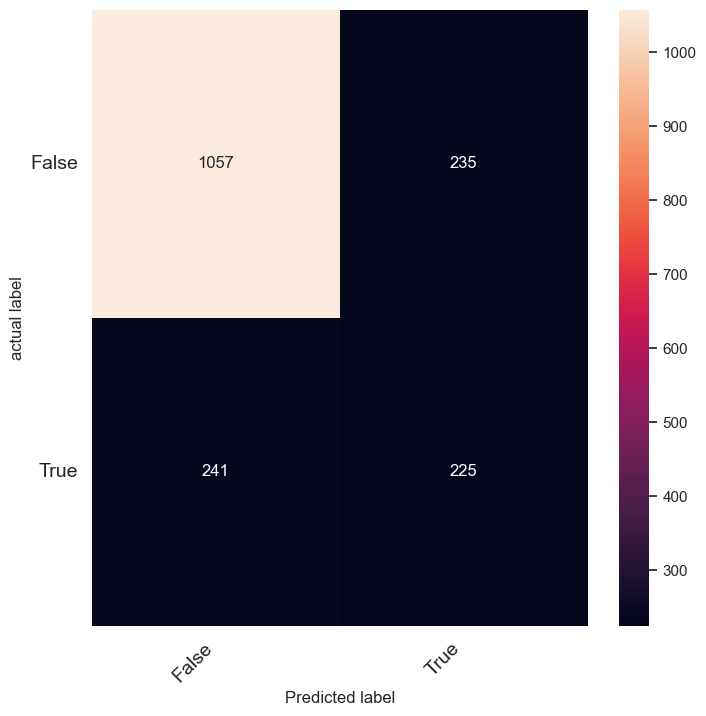

In [285]:
make_confusion_matrix(y_test, d_tree.predict(X_test))

## random forrest


In [286]:
rand_forrest = RandomForestClassifier(max_depth=7)

In [287]:
rand_forrest.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [288]:
print(classification_report(y_train, rand_forrest.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      3871
           1       0.74      0.52      0.61      1403

    accuracy                           0.82      5274
   macro avg       0.79      0.73      0.75      5274
weighted avg       0.81      0.82      0.81      5274



In [289]:
print(classification_report(y_test, rand_forrest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1292
           1       0.66      0.43      0.52       466

    accuracy                           0.79      1758
   macro avg       0.74      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758



## logistic regression

In [290]:
logreg = LogisticRegression()

In [291]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [292]:
print(classification_report(y_train, logreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3871
           1       0.67      0.56      0.61      1403

    accuracy                           0.81      5274
   macro avg       0.76      0.73      0.74      5274
weighted avg       0.80      0.81      0.80      5274



In [293]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1292
           1       0.65      0.51      0.57       466

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



## SVM

In [294]:
svm_classifier = svm.SVC()

In [295]:
svm_classifier.fit(X_train, y_train)

SVC()

In [296]:
print(classification_report(y_train, svm_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3871
           1       0.72      0.53      0.61      1403

    accuracy                           0.82      5274
   macro avg       0.78      0.73      0.75      5274
weighted avg       0.81      0.82      0.81      5274



In [297]:
print(classification_report(y_test, svm_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1292
           1       0.66      0.45      0.53       466

    accuracy                           0.79      1758
   macro avg       0.74      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758



## tensorflow

In [304]:
X_train

array([[-0.43833071,  1.53056095,  0.48313852, ..., -0.52454272,
        -0.71224139, -0.55033227],
       [-0.43833071,  0.27080696, -0.97739277, ..., -0.52454272,
        -0.71224139,  1.81708405],
       [ 2.28138245,  0.35208141,  1.16261031, ..., -0.52454272,
         1.40401838, -0.55033227],
       ...,
       [-0.43833071, -1.23277038, -1.50698109, ..., -0.52454272,
        -0.71224139,  1.81708405],
       [-0.43833071, -0.623212  ,  0.77790937, ..., -0.52454272,
         1.40401838, -0.55033227],
       [ 2.28138245, -0.05429084,  1.16760643, ..., -0.52454272,
         1.40401838, -0.55033227]])

In [305]:
X_train.shape

(5274, 30)

In [306]:
input_size = len(X_train)
output_shape = 1
model = Sequential([
    Dense(units=64, input_shape=(X_train.shape[1], ), activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=output_shape, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [307]:
model.build()

In [308]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                1984      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


In [309]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=7,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/7
165/165 [==============================] - 1s 3ms/step - loss: 0.4503 - accuracy: 0.7874 - val_loss: 0.4354 - val_accuracy: 0.7901
Epoch 2/7
165/165 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8068 - val_loss: 0.4335 - val_accuracy: 0.7907
Epoch 3/7
165/165 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8110 - val_loss: 0.4376 - val_accuracy: 0.7873
Epoch 4/7
165/165 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8172 - val_loss: 0.4323 - val_accuracy: 0.7918
Epoch 5/7
165/165 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8166 - val_loss: 0.4313 - val_accuracy: 0.7912
Epoch 6/7
165/165 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8193 - val_loss: 0.4378 - val_accuracy: 0.7827
Epoch 7/7
165/165 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8193 - val_loss: 0.4355 - val_accuracy: 0.7861


In [310]:
np.round(model.predict(X_train)).astype(np.bool8)

165/165 [==============================] - 0s 732us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [313]:
print(classification_report(y_train, np.round(model.predict(X_train)).astype(np.bool8)))

165/165 [==============================] - 0s 885us/step
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3871
           1       0.75      0.52      0.61      1403

    accuracy                           0.83      5274
   macro avg       0.80      0.73      0.75      5274
weighted avg       0.82      0.83      0.82      5274



In [314]:
print(classification_report(y_test, np.round(model.predict(X_test)).astype(np.bool8)))

55/55 [==============================] - 0s 995us/step
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1292
           1       0.65      0.43      0.52       466

    accuracy                           0.79      1758
   macro avg       0.73      0.67      0.69      1758
weighted avg       0.77      0.79      0.77      1758

